# Airline passenger Satisfaction Dataset Training

## Data Preprocessing

### Check The Dataset

In [51]:
import pandas as pd 
import numpy as np 
# from sklearn.preprocessing import LabelEncoder

In [4]:
pd.set_option('display.max_columns',None)
passenger_data=pd.read_csv('C:\\Users\\94775\\Desktop\\FDM_Mini_Project\\train.csv')
passenger_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
passenger_data.drop(['Unnamed: 0','id'],axis=1,inplace=True)
passenger_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [23]:
passenger_data.shape

(103904, 23)

#### Convert many categorical column's data type into category data type

In [47]:
categorical_indexes =list(range(6, 20))
passenger_data.iloc[:,categorical_indexes] = passenger_data.iloc[:,categorical_indexes].astype('category')
passenger_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  object  
 1   Customer Type                      103904 non-null  object  
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  object  
 4   Class                              103904 non-null  object  
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  category
 7   Departure/Arrival time convenient  103904 non-null  category
 8   Ease of Online booking             103904 non-null  category
 9   Gate location                      103904 non-null  category
 10  Food and drink                     103904 non-null  category
 11  Online boarding           

### Handle Missing values

In [24]:
passenger_data.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [25]:
# Arrival Delay in Minutes column has 310 missing values, and to handle that, fill all the missing values by the meadian of the column
# since there is no other relationship with missing data, use median
filled_col=passenger_data['Arrival Delay in Minutes'].fillna(passenger_data['Arrival Delay in Minutes'].median(axis=0))
filled_col.head()

0    18.0
1     6.0
2     0.0
3     9.0
4     0.0
Name: Arrival Delay in Minutes, dtype: float64

In [26]:
# both filled and original columns have similar standard deviation values, so that can be replace by the median value
print(passenger_data['Arrival Delay in Minutes'].std())
print(filled_col.std())

38.69868202096663
38.64977613202413


In [27]:
passenger_data['Arrival Delay in Minutes'].fillna(passenger_data['Arrival Delay in Minutes'].median(axis=0),inplace=True)

In [28]:
passenger_data.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

- Now there is no any missing values in the dataset

In [29]:
passenger_data.nunique()

Gender                                  2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      3802
Inflight wifi service                   6
Departure/Arrival time convenient       6
Ease of Online booking                  6
Gate location                           6
Food and drink                          6
Online boarding                         6
Seat comfort                            6
Inflight entertainment                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         6
Inflight service                        6
Cleanliness                             6
Departure Delay in Minutes            446
Arrival Delay in Minutes              455
satisfaction                            2
dtype: int64

- Except Age, Flight Distance, Departure Delay in Minutes, Arrival Delay in Minutes columns, all the other columns are categorical columns

### Handle Categorical Columns

#### Handle Few Categories using one hot encoding

- Since Gender, Customer_Type, Type of Travel, Class, and the output column which is satisfaction are having small number of categories, we can perform one hot encoding to handle categories in mentioned columns.

In [33]:
# take categorical columns seperately which are having few categories
df=passenger_data[['Gender','Customer Type','Type of Travel','Class','satisfaction']]
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied


In [40]:
df_dummies=pd.get_dummies(df,dtype=int).astype('category')
df_dummies.head()

,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,0,1,1,0,0,1,0,0,1,1,0
1,0,1,0,1,1,0,1,0,0,1,0
2,1,0,1,0,1,0,1,0,0,0,1
3,1,0,1,0,1,0,1,0,0,1,0
4,0,1,1,0,1,0,1,0,0,0,1


In [41]:
df_dummies.columns

Index(['Gender_Female', 'Gender_Male', 'Customer Type_Loyal Customer',
       'Customer Type_disloyal Customer', 'Type of Travel_Business travel',
       'Type of Travel_Personal Travel', 'Class_Business', 'Class_Eco',
       'Class_Eco Plus', 'satisfaction_neutral or dissatisfied',
       'satisfaction_satisfied'],
      dtype='object')

In [42]:
#avoid dummy variable trap
df_dummies.drop(['Gender_Male','Customer Type_disloyal Customer','Type of Travel_Personal Travel','Class_Eco Plus','satisfaction_neutral or dissatisfied'],axis=1,inplace=True)
df_dummies.head()

,Gender_Female,Customer Type_Loyal Customer,Type of Travel_Business travel,Class_Business,Class_Eco,satisfaction_satisfied
0,0,1,0,0,0,0
1,0,0,1,1,0,0
2,1,1,1,1,0,1
3,1,1,1,1,0,0
4,0,1,1,1,0,1


In [43]:
# merge above dummy variables with the original dataset 
merged_passenger_data = pd.concat([passenger_data,df_dummies],axis='columns')
merged_passenger_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Female,Customer Type_Loyal Customer,Type of Travel_Business travel,Class_Business,Class_Eco,satisfaction_satisfied
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,0,1,0,0,0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,0,0,1,1,0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied,1,1,1,1,0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,1,1,1,1,0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied,0,1,1,1,0,1


In [44]:
#since there are dummy variables in the merged dataset, no need to have original columns anymore
merged_passenger_data.drop(['Gender','Customer Type','Type of Travel','Class','satisfaction'],axis=1,inplace=True)
merged_passenger_data.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Customer Type_Loyal Customer,Type of Travel_Business travel,Class_Business,Class_Eco,satisfaction_satisfied
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,1,0,0,0,0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0,0,1,1,0,0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,1,1,1,0,1
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,1,1,1,1,0,0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,0,1,1,1,0,1


#### Handle Many Categories

- from Inflight wifi service column to Cleanliness column, all the in between columns including mentioned columns are having maximum 6 categories for each.
- to handle those multi categorical columns, can't use one hot encoding, since that will lead to curse of dimensionality
- above mentioned columns are having the rating values starting from 1-5

In [ ]:
#ordinal/label encoding
# rank={'1':1,'2':2,'3':3,'4':4,'5':5}
# df['day_ordinal']=df.day_of_week.map(weekday_map)

### Statistics for both categorical and non categorical columns

In [49]:
#statistics for categorical columns
merged_passenger_data.describe(include=['category'])

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Gender_Female,Customer Type_Loyal Customer,Type of Travel_Business travel,Class_Business,Class_Eco,satisfaction_satisfied
count,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904
unique,6,6,6,6,6,6,6,6,6,6,5,6,6,6,2,2,2,2,2,2
top,3,4,3,3,4,4,4,4,4,4,4,4,4,4,1,1,1,0,0,0
freq,25868,25546,24449,28577,24359,30762,31765,29423,30867,28789,37383,29055,37945,27179,52727,84923,71655,54239,57159,58879


In [45]:
# get statistics for numerical value columns
merged_passenger_data.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,14.815618,15.133392
std,15.114964,997.147281,38.230901,38.649776
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


### Split dataset into train and test data

In [52]:
x=merged_passenger_data.drop('satisfaction_satisfied',axis=1)
y=merged_passenger_data['satisfaction_satisfied']

In [56]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

### Feature Selection

In [57]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [58]:
#higher the value, more relavant the feature is
print(model.feature_importances_)

[0.02188675 0.02116781 0.13165016 0.01876502 0.04275261 0.016622
 0.01355036 0.12101348 0.04969637 0.04833359 0.03350228 0.03021313
 0.03002916 0.02855162 0.02910581 0.03160846 0.01093381 0.01115814
 0.00698123 0.04962056 0.10409125 0.08737056 0.06139586]


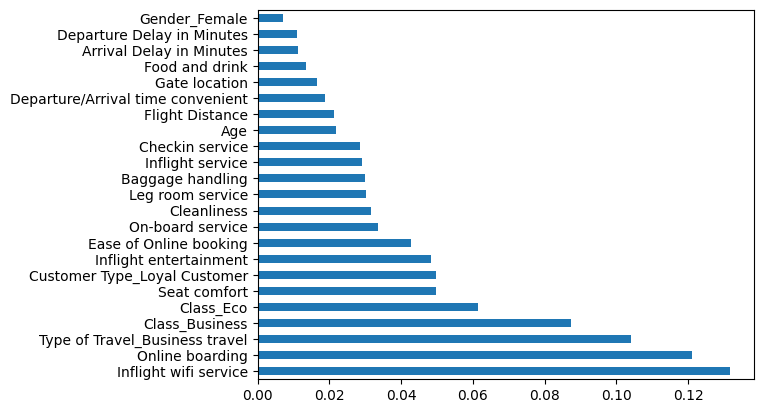

In [59]:
ranked_features=pd.Series(model.feature_importances_,index=x.columns)
ranked_features.nlargest(23).plot(kind='barh')
plt.show()

- Above graph shows importance of the features, to predict the satisfaction level
- By considering the graph, we can ignore features that are less important since they may lead to curse of dimensionality
- by reducing number of features, able to increase the accuracy as well
- so that considered only top 18 features in order to train the model

# Model Training